In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from probeinterface import Probe
from probeinterface.plotting import plot_probe
from probeinterface import combine_probes
import probeinterface

In [2]:
n = 8
positions = np.zeros((n, 2))

positions[0] = -37/2, 140
positions[1] = -29/2, 100
positions[2] = -21/2, 60
positions[3] = -8.5, 20
positions[4] = 0, 0
positions[5] = 17/2, 40
positions[6] = 25/2, 80
positions[7] = 33/2, 120

In [3]:
probe = Probe(ndim=2, si_units='um')
probe.set_contacts(positions=positions, shapes='rect', shape_params={'width': 10, 'height': 16})

In [4]:
polygon = [(0,-22),(-29/2,0),(-52/2,140),(-52/2,240),(52/2,240),(52/2,140),(29/2,0),(0,-22)]
#I want to add to polygon array points that are shifted 200 to the right 
#and 0 to the bottom (x,y)
polygon0 = np.array(polygon)
#I want to add to the end of the array
polygon = np.append(polygon0, polygon0+(200,0), axis=0)
polygon = np.append(polygon, polygon0+(400,0), axis=0)
polygon = np.append(polygon, polygon0+(600,0), axis=0)


probe.set_planar_contour(polygon)

In [5]:
probe1 = probe.copy()
probe1.move([200, 0])

probe2 = probe.copy()
probe2.move([400, 0])

probe3 = probe.copy()
probe3.move([600, 0])

multi_shank = combine_probes([probe, probe1, probe2, probe3],connect_shape=False)

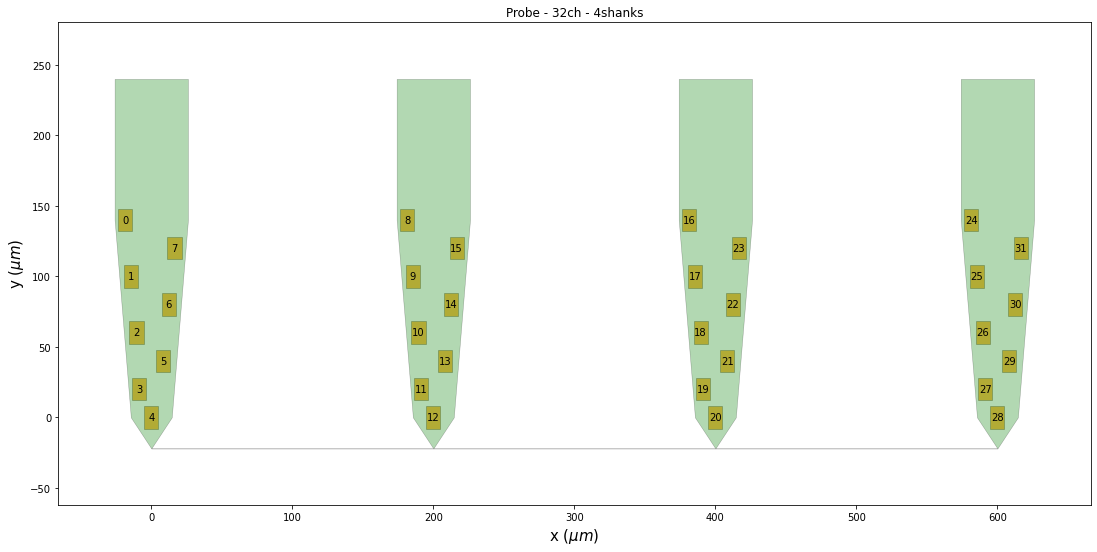

In [6]:
multi_shank.set_planar_contour(polygon)
plot_probe(multi_shank, with_channel_index=True)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [7]:
probeinterface.wiring.pathways['A32>RHD2132']=[30,26,21,17,27,22,20,25,28,23,19,24,29,18,31,16,0,15,2,13,8,9,7,1,6,14,10,11,5,12,4,3]
multi_shank.wiring_to_device('A32>RHD2132')
print(multi_shank.device_channel_indices)

[30 26 21 17 27 22 20 25 28 23 19 24 29 18 31 16  0 15  2 13  8  9  7  1
  6 14 10 11  5 12  4  3]


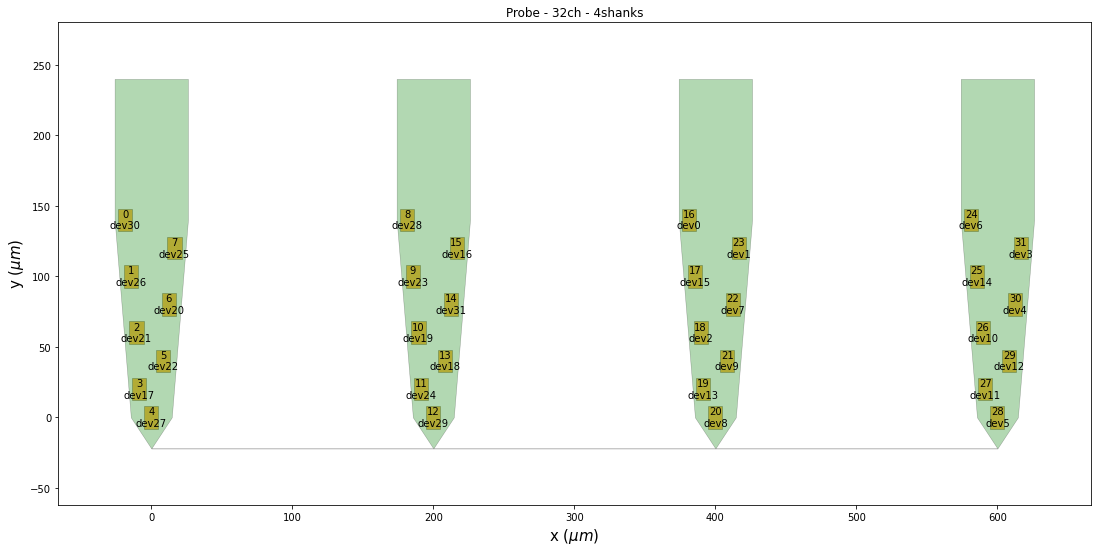

In [8]:
fig, ax = plt.subplots(figsize=(5, 15))
plot_probe(multi_shank, with_channel_index=True, with_device_index=True, ax=ax)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)